# Python NLTK library demo

### First Import Dependencies



In [1]:
from PIL import Image
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer


## Lets look at an example Invoice

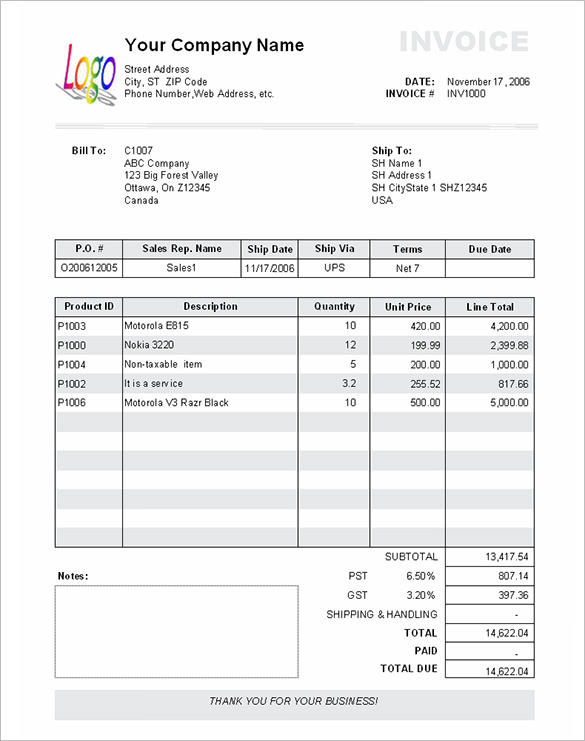

In [2]:

raw_invoice_image_path = 'invoice.jpg'
raw_invoice_image = Image.open(raw_invoice_image_path)
raw_invoice_image

## After Some OCR text scraping, we assume data is in an unformatted text file.

### Here I've manually created a file, OCR is outside of the scope of this demo

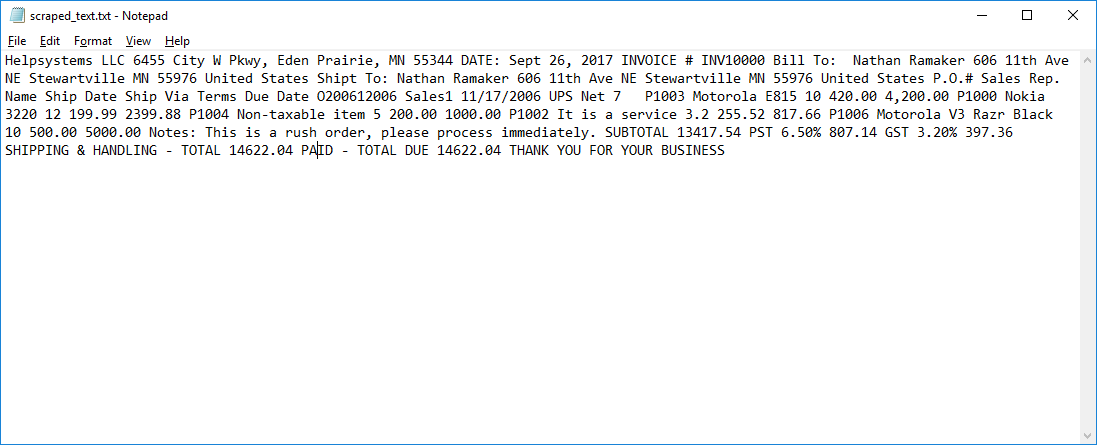

In [3]:
scraped_image_path = 'ocr_scraped.png'
scraped_image = Image.open(scraped_image_path)
scraped_image

## Lets read the text file and tokenize it

In [4]:
def readFile(path):
    file = open(path, "r")
    text = file.read()
    #print("Text = ", text)
    return text

#open file and tokenize the words
text = readFile('scraped_text.txt')
tokens = nltk.word_tokenize(text)
tokens


['Helpsystems',
 'LLC',
 '6455',
 'City',
 'W',
 'Pkwy',
 ',',
 'Eden',
 'Prairie',
 ',',
 'MN',
 '55344',
 'DATE',
 ':',
 'Sept',
 '26',
 ',',
 '2017',
 'INVOICE',
 '#',
 'INV10000',
 'Bill',
 'To',
 ':',
 'Nathan',
 'Ramaker',
 '606',
 '11th',
 'Ave',
 'NE',
 'Stewartville',
 'MN',
 '55976',
 'United',
 'States',
 'Shipt',
 'To',
 ':',
 'Nathan',
 'Ramaker',
 '606',
 '11th',
 'Ave',
 'NE',
 'Stewartville',
 'MN',
 '55976',
 'United',
 'States',
 'P.O.',
 '#',
 'Sales',
 'Rep.',
 'Name',
 'Ship',
 'Date',
 'Ship',
 'Via',
 'Terms',
 'Due',
 'Date',
 'O200612006',
 'Sales1',
 '11/17/2006',
 'UPS',
 'Net',
 '7',
 'P1003',
 'Motorola',
 'E815',
 '10',
 '420.00',
 '4,200.00',
 'P1000',
 'Nokia',
 '3220',
 '12',
 '199.99',
 '2399.88',
 'P1004',
 'Non-taxable',
 'item',
 '5',
 '200.00',
 '1000.00',
 'P1002',
 'It',
 'is',
 'a',
 'service',
 '3.2',
 '255.52',
 '817.66',
 'P1006',
 'Motorola',
 'V3',
 'Razr',
 'Black',
 '10',
 '500.00',
 '5000.00',
 'Notes',
 ':',
 'This',
 'is',
 'a',
 'rush

### Lets clean the data by removing punctuation, stop words, and very short words.  In this case I've also chosen to remove tokens that are only numerical, which may or may not be correct.

In [5]:
#tokenize with regular expression that removes symbols
def tokenize_alpha_num(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    return tokens                            
                                
#remove stopwords
def remove_stop_words(tokens):
    filteredTokens=[]
    swords = set(stopwords.words('english'))
    for t in tokens:
        if t not in swords:
            filteredTokens.append(t)
    return filteredTokens

#remove tokens below n characters
def remove_short_words(tokens, min):
    filteredTokens = []
    for t in tokens:
        if len(t) >= min:
            filteredTokens.append(t)
    return filteredTokens

#remove numbers
def remove_digits(tokens):
    filteredTokens = []
    for t in tokens:
        if not t.isdigit():
            filteredTokens.append(t)
    return filteredTokens

tokens = tokenize_alpha_num(text)
tokens = remove_stop_words(tokens)
tokens = remove_short_words(tokens, 3)
tokens = remove_digits(tokens)
tokens


['Helpsystems',
 'LLC',
 'City',
 'Pkwy',
 'Eden',
 'Prairie',
 'DATE',
 'Sept',
 'INVOICE',
 'INV10000',
 'Bill',
 'Nathan',
 'Ramaker',
 '11th',
 'Ave',
 'Stewartville',
 'United',
 'States',
 'Shipt',
 'Nathan',
 'Ramaker',
 '11th',
 'Ave',
 'Stewartville',
 'United',
 'States',
 'Sales',
 'Rep',
 'Name',
 'Ship',
 'Date',
 'Ship',
 'Via',
 'Terms',
 'Due',
 'Date',
 'O200612006',
 'Sales1',
 'UPS',
 'Net',
 'P1003',
 'Motorola',
 'E815',
 'P1000',
 'Nokia',
 'P1004',
 'Non',
 'taxable',
 'item',
 'P1002',
 'service',
 'P1006',
 'Motorola',
 'Razr',
 'Black',
 'Notes',
 'This',
 'rush',
 'order',
 'please',
 'process',
 'immediately',
 'SUBTOTAL',
 'PST',
 'GST',
 'SHIPPING',
 'HANDLING',
 'TOTAL',
 'PAID',
 'TOTAL',
 'DUE',
 'THANK',
 'YOU',
 'FOR',
 'YOUR',
 'BUSINESS']

## Here we have an opportunity to use machine learning to recognize tokens as items that are relevant to the customer's business.  For example, we could identify tokens in the format PXXXX as Product IDs in our system.

### NOTE that I'm not really doing machine learning here, only faking it.

### To simulate this, I'll cheat and use simple functions to replace product numbers with 'PRODUCTID' and an Invoice number with INVOICEID

In [6]:
def is_product_id(token):
    if len(token)==5 and token[:1]=='P' and token[1:].isdigit():
        return True
    return False

def is_invoice_id(token):
    if len(token)==8 and token[:3]=='INV' and token[3:].isdigit():
        return True
    return False

def recognize_my_items(tokens):
    recognized_tokens=[]
    for t in tokens:
        if is_product_id(t):
            recognized_tokens.append("PRODUCTID")
        elif is_invoice_id(t):
            recognized_tokens.append("INVOICEID")
        else:
            recognized_tokens.append(t)
    return recognized_tokens

tokens = recognize_my_items(tokens)
tokens

['Helpsystems',
 'LLC',
 'City',
 'Pkwy',
 'Eden',
 'Prairie',
 'DATE',
 'Sept',
 'INVOICE',
 'INVOICEID',
 'Bill',
 'Nathan',
 'Ramaker',
 '11th',
 'Ave',
 'Stewartville',
 'United',
 'States',
 'Shipt',
 'Nathan',
 'Ramaker',
 '11th',
 'Ave',
 'Stewartville',
 'United',
 'States',
 'Sales',
 'Rep',
 'Name',
 'Ship',
 'Date',
 'Ship',
 'Via',
 'Terms',
 'Due',
 'Date',
 'O200612006',
 'Sales1',
 'UPS',
 'Net',
 'PRODUCTID',
 'Motorola',
 'E815',
 'PRODUCTID',
 'Nokia',
 'PRODUCTID',
 'Non',
 'taxable',
 'item',
 'PRODUCTID',
 'service',
 'PRODUCTID',
 'Motorola',
 'Razr',
 'Black',
 'Notes',
 'This',
 'rush',
 'order',
 'please',
 'process',
 'immediately',
 'SUBTOTAL',
 'PST',
 'GST',
 'SHIPPING',
 'HANDLING',
 'TOTAL',
 'PAID',
 'TOTAL',
 'DUE',
 'THANK',
 'YOU',
 'FOR',
 'YOUR',
 'BUSINESS']

## We can use NLTK to tag the items as nouns, verbs, etc.

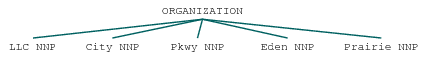

In [7]:
tagged = nltk.pos_tag(tokens)
tagged

entities = nltk.ne_chunk(tagged)
entities[1]


# Stem the tokens so we can later combine terms based on their root words

In [8]:
#performing stemming
def stem_tokens(tokens):
    stemmer = SnowballStemmer("english")
    stemmed_tokens = []
    for t in tokens:
        stemmed_tokens.append(stemmer.stem(t))
    return stemmed_tokens

tokens = stem_tokens(tokens)
tokens

[u'helpsystem',
 u'llc',
 u'citi',
 u'pkwi',
 u'eden',
 u'prairi',
 u'date',
 u'sept',
 u'invoic',
 u'invoiceid',
 u'bill',
 u'nathan',
 u'ramak',
 u'11th',
 u'ave',
 u'stewartvill',
 u'unit',
 u'state',
 u'shipt',
 u'nathan',
 u'ramak',
 u'11th',
 u'ave',
 u'stewartvill',
 u'unit',
 u'state',
 u'sale',
 u'rep',
 u'name',
 u'ship',
 u'date',
 u'ship',
 u'via',
 u'term',
 u'due',
 u'date',
 u'o200612006',
 u'sales1',
 u'up',
 u'net',
 u'productid',
 u'motorola',
 u'e815',
 u'productid',
 u'nokia',
 u'productid',
 u'non',
 u'taxabl',
 u'item',
 u'productid',
 u'servic',
 u'productid',
 u'motorola',
 u'razr',
 u'black',
 u'note',
 u'this',
 u'rush',
 u'order',
 u'pleas',
 u'process',
 u'immedi',
 u'subtot',
 u'pst',
 u'gst',
 u'ship',
 u'handl',
 u'total',
 u'paid',
 u'total',
 u'due',
 u'thank',
 u'you',
 u'for',
 u'your',
 u'busi']

## Let's try to retag the stemmed items.

In [9]:
tagged = nltk.pos_tag(tokens)
tagged


[(u'helpsystem', 'NN'),
 (u'llc', 'VBZ'),
 (u'citi', 'JJ'),
 (u'pkwi', 'NN'),
 (u'eden', 'JJ'),
 (u'prairi', 'NN'),
 (u'date', 'NN'),
 (u'sept', 'VBD'),
 (u'invoic', 'JJ'),
 (u'invoiceid', 'NN'),
 (u'bill', 'NN'),
 (u'nathan', 'VBZ'),
 (u'ramak', 'VBZ'),
 (u'11th', 'CD'),
 (u'ave', 'NN'),
 (u'stewartvill', 'NN'),
 (u'unit', 'NN'),
 (u'state', 'NN'),
 (u'shipt', 'NN'),
 (u'nathan', 'NN'),
 (u'ramak', 'VBZ'),
 (u'11th', 'CD'),
 (u'ave', 'NN'),
 (u'stewartvill', 'NN'),
 (u'unit', 'NN'),
 (u'state', 'NN'),
 (u'sale', 'NN'),
 (u'rep', 'NN'),
 (u'name', 'NN'),
 (u'ship', 'NN'),
 (u'date', 'NN'),
 (u'ship', 'NN'),
 (u'via', 'IN'),
 (u'term', 'NN'),
 (u'due', 'JJ'),
 (u'date', 'NN'),
 (u'o200612006', 'NN'),
 (u'sales1', 'VBD'),
 (u'up', 'RP'),
 (u'net', 'JJ'),
 (u'productid', 'NN'),
 (u'motorola', 'NN'),
 (u'e815', 'NN'),
 (u'productid', 'NN'),
 (u'nokia', 'JJ'),
 (u'productid', 'NN'),
 (u'non', 'NN'),
 (u'taxabl', 'JJ'),
 (u'item', 'NN'),
 (u'productid', 'JJ'),
 (u'servic', 'JJ'),
 (u'product

## It did an okay job, but not perfect.  For example it thinks 'ship' is a Noun, when in this context it's a Verb. 

## Let's look at what these tags mean.

In [10]:

nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

## Let's combine like terms and sort

In [11]:
def combine_tokens(tokens):
    dict = {}
    for t in tokens:
        count = 1
        if t in dict.keys():
            count = dict[t] + 1
        dict[t] = count
    return dict

tokens_dict = combine_tokens(tagged)
sorted(tokens_dict.items(), key=lambda x: x[1], reverse=True)

[((u'productid', 'NN'), 4),
 ((u'date', 'NN'), 3),
 ((u'ship', 'NN'), 3),
 ((u'stewartvill', 'NN'), 2),
 ((u'state', 'NN'), 2),
 ((u'motorola', 'NN'), 2),
 ((u'unit', 'NN'), 2),
 ((u'due', 'JJ'), 2),
 ((u'ave', 'NN'), 2),
 ((u'11th', 'CD'), 2),
 ((u'ramak', 'VBZ'), 2),
 ((u'pkwi', 'NN'), 1),
 ((u'helpsystem', 'NN'), 1),
 ((u'note', 'NN'), 1),
 ((u'name', 'NN'), 1),
 ((u'rep', 'NN'), 1),
 ((u'you', 'PRP'), 1),
 ((u'razr', 'JJ'), 1),
 ((u'sale', 'NN'), 1),
 ((u'net', 'JJ'), 1),
 ((u'total', 'NN'), 1),
 ((u'eden', 'JJ'), 1),
 ((u'servic', 'JJ'), 1),
 ((u'prairi', 'NN'), 1),
 ((u'item', 'NN'), 1),
 ((u'subtot', 'NN'), 1),
 ((u'handl', 'JJ'), 1),
 ((u'pst', 'NN'), 1),
 ((u'paid', 'VBD'), 1),
 ((u'order', 'NN'), 1),
 ((u'gst', 'NN'), 1),
 ((u'o200612006', 'NN'), 1),
 ((u'nathan', 'VBZ'), 1),
 ((u'via', 'IN'), 1),
 ((u'taxabl', 'JJ'), 1),
 ((u'sept', 'VBD'), 1),
 ((u'this', 'DT'), 1),
 ((u'bill', 'NN'), 1),
 ((u'term', 'NN'), 1),
 ((u'busi', 'NN'), 1),
 ((u'thank', 'NN'), 1),
 ((u'up', 'RP'),

## These tokens are our features that we should use to classify the document type against ones that we already know about